In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import passenger

In [2]:
fastq_path = "input/AV_IgYKSTOP_9A_collapse-unique.fastq.gz"
blast_path = "passenger-blast/AV_IgYKSTOP_9A_collapse-unique.atleast2.blast.tsv"
prefix = "9a"
mut_freq_name = prefix+"_mut_freq"
chigy = passenger.CHIGY_LC
max_mutation_count = 10
max_n_count = 10
# 2 or 3 gap segments, which corresponds to 0 or 1 indels
allowable_gap_segment_counts = [2, 3]

In [3]:
passenger.test_summarize_alignment()
passenger.test_correct_alignment()
passenger.test_summarize_alignment()
passenger.test_compute_mutation_counts_by_base()

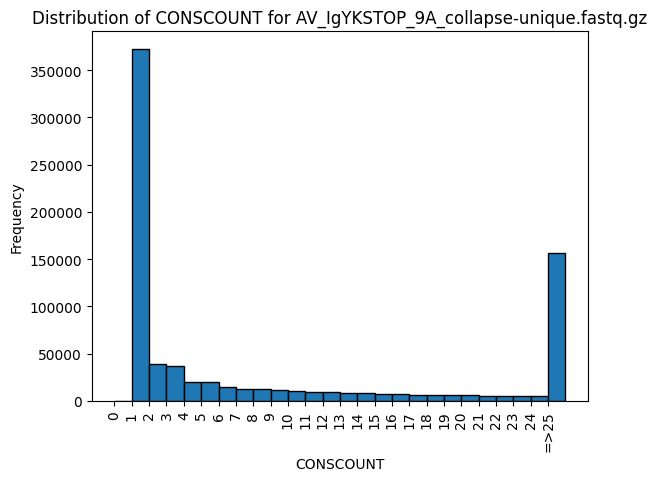

In [4]:
passenger.umi_histogram(fastq_path, 25)


In [5]:
blast_df = passenger.blast_df_of_blast_files([blast_path])

processed_stop_df = chigy.processed_stop_df_of_blast_df(blast_df)
processed_stop_df

,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
0,TTTCTTAAGACTGGCAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,60,79,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATG...,2,False,"[5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 23, 2...","[C, C, C, T, C, T, T, C, A, G, C, G, G, C, G, ...",[],86,0,0
1,GCTGACCAAAGAAAGCG|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,37,56,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGG...,2,False,"[266, 320]","[A, G]",[],2,0,1
2,TGATCAGGGTATACTGC|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,78,97,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[267, 309]","[T, T]",[],2,0,2
3,GGAAACAGGCACACGGG|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,61,80,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,2,True,"[275, 278, 282, 283]","[T, T, G, T]",[],4,0,3
4,GATATGGGGGATCTATA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,37,56,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGG...,2,True,"[91, 162, 191, 297, 309, 319]","[A, A, T, G, G, T]",[],6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65542,GACAACTGAACTACAAA|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,59,77,32.000000,...,AV_IgYKSTOP_9A_collapse-unique,GAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGG...,2,False,"[5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 23, 2...","[C, C, C, T, C, T, T, C, A, G, C, G, G, C, G, ...",[],86,0,65542
65560,ACTCGGGGCAACATTAG|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,80,98,32.000000,...,AV_IgYKSTOP_9A_collapse-unique,GGCAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAG...,2,True,[278],[T],[],1,0,65560
65575,TACTTGAGAGACACAAC|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,78,96,32.000000,...,AV_IgYKSTOP_9A_collapse-unique,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[256, 290]","[T, A]",[],2,0,65575
65587,TATCGCTTATAACAACT|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,74,92,32.000000,...,AV_IgYKSTOP_9A_collapse-unique,GGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGACGC...,2,False,"[1, 3, 4, 5, 7, 9, 10, 11, 13, 14, 15, 18, 19,...","[G, C, A, G, A, C, C, T, A, G, A, C, A, C, T, ...",[321],87,1,65587


In [6]:
chigy.pretty_print_alignments(processed_stop_df.head())

> AV_IgYKSTOP_9A_collapse-unique 0
GA--CATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
||  |||..|.....|....|||||.|.|..|..|.|..||.||....|..||||..|||| ||| ..||...|.|..||....|||..|..|.|....|..|...||.|||  |.||..||.|.|.|..||...|.|........|...||.||.|....|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||||||          
GAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAG-GTC-TGTGGTTGTCTGGTGTTGATGGAGACATTGTGATGACTCAGTCTCA--AAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTT

In [7]:
# Group by 'dataset' and count the number of rows in each group
row_counts_by_dataset = processed_stop_df.groupby('dataset').size()

# Print the count of rows for each 'dataset'
print(row_counts_by_dataset)


dataset
AV_IgYKSTOP_9A_collapse-unique    42572
dtype: int64


In [8]:
processed_stop_df["mutation_count"].value_counts()[:20].sort_index()

mutation_count
0      1738
1      7408
2     11477
3      7675
4      4440
5      2459
6      1376
7       730
8       365
9       152
10      105
80       79
81      168
82      235
83      350
84      361
85      343
86      287
87      165
88      117
Name: count, dtype: int64

In [9]:
chigy_believable = processed_stop_df[(processed_stop_df["mutation_count"] < max_mutation_count) & (processed_stop_df["n_count"] < max_n_count) & (processed_stop_df["bookended_by_gaps"] == True)].copy()

chigy_believable


,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
2,TGATCAGGGTATACTGC|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,78,97,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[267, 309]","[T, T]",[],2,0,2
3,GGAAACAGGCACACGGG|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,61,80,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCAT...,2,True,"[275, 278, 282, 283]","[T, T, G, T]",[],4,0,3
4,GATATGGGGGATCTATA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,37,56,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGG...,2,True,"[91, 162, 191, 297, 309, 319]","[A, A, T, G, G, T]",[],6,0,4
6,AGTAAGACACGGGCTAG|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,56,75,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGT...,2,True,"[88, 94, 319]","[A, G, T]",[],3,0,6
7,GAGAACGAAAACGACCA|PRCONS=Mus-p5-IgK|SEQORIENT=...,100.0,20,0,0,1,20,57,76,0.000546,...,AV_IgYKSTOP_9A_collapse-unique,GCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAG...,2,True,[159],[T],[],1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65510,TAGGACGAGTTTGGTGA|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,58,76,32.000000,...,AV_IgYKSTOP_9A_collapse-unique,GGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGA...,2,True,[],[],[],0,0,65510
65534,AGGTGTCTAAGTAAAAG|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,36,54,32.000000,...,AV_IgYKSTOP_9A_collapse-unique,GGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGTT...,2,True,[],[],[],0,0,65534
65560,ACTCGGGGCAACATTAG|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,80,98,32.000000,...,AV_IgYKSTOP_9A_collapse-unique,GGCAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAG...,2,True,[278],[T],[],1,0,65560
65575,TACTTGAGAGACACAAC|PRCONS=Mus-p5-IgK|SEQORIENT=...,95.0,20,0,1,1,20,78,96,32.000000,...,AV_IgYKSTOP_9A_collapse-unique,GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAG...,2,True,"[256, 290]","[T, A]",[],2,0,65575


In [10]:
# Find representatives of the various gap counts
representative_gap_counts = chigy_believable.drop_duplicates(subset=["gap_segment_count"])
representative_gap_counts = representative_gap_counts.sort_values(by=["gap_segment_count"])
chigy.pretty_print_alignments(representative_gap_counts)

> AV_IgYKSTOP_9A_collapse-unique 2
---------------------------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                                         |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||.||||||||||||          
GAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGTGGTT

In [11]:
chigy_believable = chigy_believable[chigy_believable["gap_segment_count"].isin(allowable_gap_segment_counts)]
chigy_believable["mutation_count"].value_counts().sort_index()

mutation_count
0     1705
1     7319
2    11298
3     7492
4     4283
5     2359
6     1316
7      678
8      332
9      117
Name: count, dtype: int64

In [12]:
# Find representatives of the various gap counts
representative_mutation_counts = chigy_believable.drop_duplicates(subset=["mutation_count"])
representative_mutation_counts = representative_mutation_counts.sort_values(by=["mutation_count"])
chigy.pretty_print_alignments(representative_mutation_counts)

> AV_IgYKSTOP_9A_collapse-unique 37
----------------------------------------------------------------------------------------------------------GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTATCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCACCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATAACAGCTATCCTCTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAAC----------
                                                                                                          ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||          
GCAGCTGCCAGGAGCCTAAGAAGCATCCTCTCTTCCAGCTCTCAGAGACGCGCGCCTCCACCATGGAGTCACAGACTCAGGTCTGT

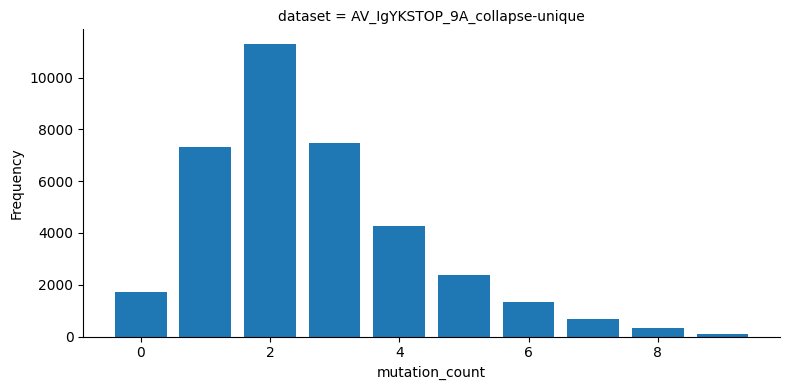

In [13]:
passenger.make_mutation_histogram(chigy_believable)

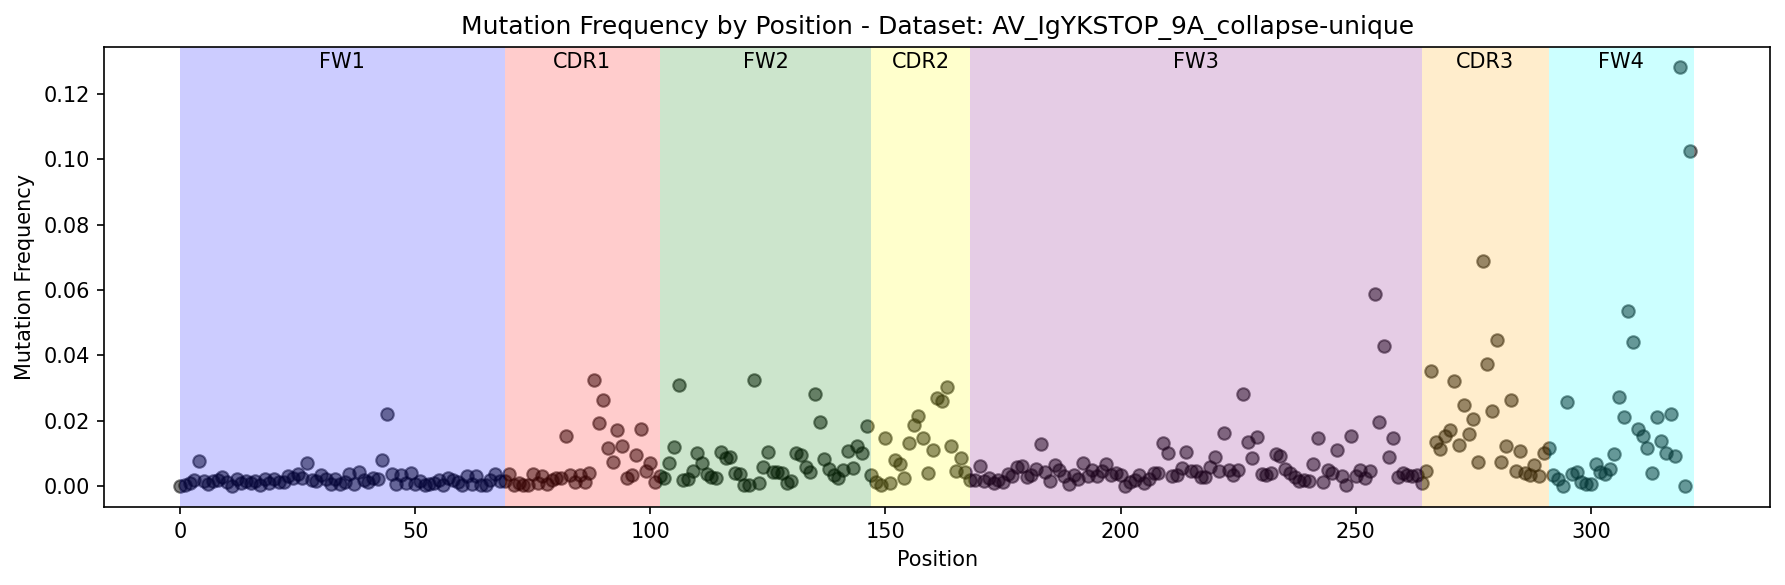

In [14]:
chigy.make_mutation_rate_plot(chigy_believable)


In [15]:
counts_by_base = passenger.compute_mutation_counts_by_base(chigy_believable, chigy.chigy_stop_trimmed)

counts_by_base.to_csv("output/"+prefix+"_counts_by_base.csv")

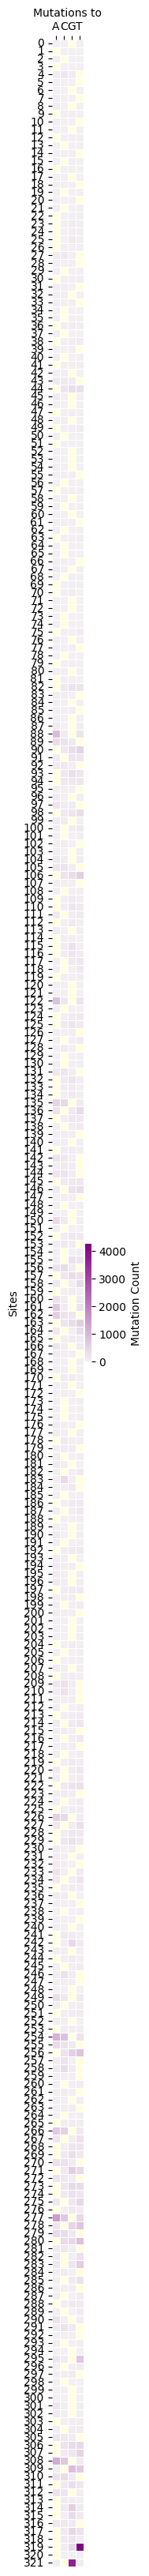

In [16]:
passenger.create_mutation_heatmap(counts_by_base)

In [17]:
counts_by_base.iloc[319]

A      -1
C      63
G     404
T    4256
Name: 319, dtype: int64

In [18]:
chigy_believable["sequence"].str[-20:].value_counts()


sequence
GAAATAAAACGGGCTGATGC    25387
GAAATAATACGGGCTGATGC     2689
GAAATAAAAGGGGCTGATGC     2137
GAAATAATAGGGGCTGATGC      726
GAGATAAAACGGGCTGATGC      429
                        ...  
GAAATAAAAGGGCCTGATGC        1
GAAATAATAGGGNCTGATGC        1
AAATAAAAAGGGGCTGATGC        1
GCAATTAAACGGGCTGATGC        1
GAAATAANAGGGGATGATGC        1
Name: count, Length: 411, dtype: int64

<Axes: xlabel='site'>

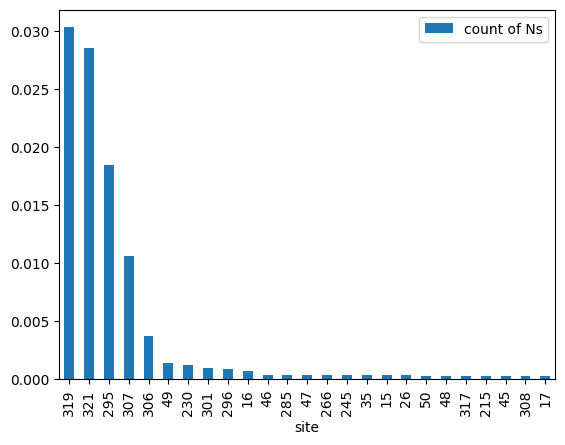

In [19]:
n_series = pd.DataFrame({"count of Ns": passenger.compute_thing_counts(chigy_believable, "n_positions")}).sort_values(by="count of Ns", ascending=False)
# set the index name of n_series to be "site"
n_series.index.name = "site"

n_frac = n_series / len(chigy_believable)
n_frac.iloc[:25].plot.bar()

In [20]:
len(chigy_believable)

36899

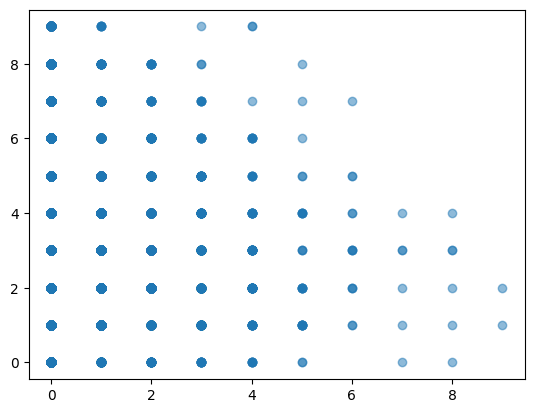

In [21]:
# make a scatter plot of chigy_believable["n_count"] versus chigy_believable["mutation_count"]
plt.scatter(chigy_believable["n_count"], chigy_believable["mutation_count"], alpha=0.5)

In [23]:
mutation_frequency_by_position = passenger.mutation_frequency_by_position_of(chigy_believable)
pd.DataFrame({mut_freq_name: mutation_frequency_by_position}).to_csv("output/"+mut_freq_name+".csv", index=False)